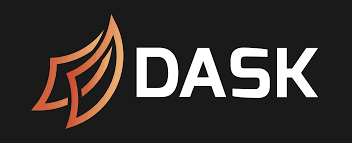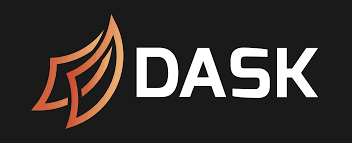

[https://dask.org/](http://)


### Why do I choose to use Dask?

Dask enables natural scaling of Pandas, Scikit-Learn, and Numpy workflows with little rewriting when dealing with large datasets with a single computer. It works effectively with these tools, copying the majority of their API and internal data structures. Furthermore, Dask collaborates with these libraries to guarantee that they progress in a consistent manner, reducing friction when moving from a local laptop to a multi-core workstation, and finally to a distributed cluster. 

### Learning Outcome

* Analysing images on a single desktop using dask
* Preprocessing of image dataset

### Importing the libraries

In [ ]:
!pip install "dask[complete]"

In [ ]:
!pip install dask_image
import dask_image.imread
import dask_image.ndfilters
import dask_image.ndmeasure
import dask.array as da

In [ ]:
!pip install scikit-image --upgrade-strategy only-if-needed

In [ ]:
from keras.models import Model, Sequential
from keras.layers import Activation, Dense, BatchNormalization, Dropout, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D, Input, Reshape
from keras import backend as K
from keras.optimizers import Adam, SGD
import tensorflow as tf
import numpy as np
import pandas as pd
import glob
import gc
import cv2
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

import os
from skimage import data, io

from sklearn.model_selection import train_test_split
from warnings import filterwarnings

filterwarnings('ignore')
plt.rcParams["axes.grid"] = False
np.random.seed(101)

In [ ]:
!mkdir temp
!mkdir temp-test
!mkdir temp-train

### About the dataset

The datasets was publicly made available by Kaggle but provided by the International Skin Imaging Collaboration (ISIC), funded by the International Society for Digital Imaging of the Skin, is an international initiative to improve melanoma diagnosis (ISDIS). The ISIC Archive houses the world's largest collection of high-resolution dermoscopic photographs of skin lesions. 
The datasets can be downloaded from this link
[https://www.kaggle.com/c/siim-isic-melanoma-classification](http://)


In [ ]:
filename_pattern = os.path.join('temp', '/kaggle/input/siic-melanoma-384x384-test/train/ISIC_*.jpg')
isic_images = dask_image.imread.imread(filename_pattern)
print(isic_images)

filename_pattern1 = os.path.join('temp-test', '/kaggle/input/siic-melanoma-384x384-test/test/ISIC_*.jpg')
isic_test = dask_image.imread.imread(filename_pattern1)
print(isic_test)

filename_pattern2 = os.path.join('temp-train', '/kaggle/input/siic-melanoma-384x384-test/train/ISIC_*.jpg')
isic_train = dask_image.imread.imread(filename_pattern2)
print(isic_train)

In [ ]:
def grayscale(rgb):
    result = ((rgb[..., 0] * 0.2125) +
              (rgb[..., 1] * 0.7154) +
              (rgb[..., 2] * 0.0721))
    return result

**Taking a bitchunk of the images and analysing it**

Splitting one of the isic image into 4 non-overlapping tiles for segmentation purpose


In [ ]:
from PIL import Image
pixels = []
i = Image.open("/kaggle/input/siic-melanoma-384x384-test/test/ISIC_0546632.jpg").convert("LA") 
p = i.load()
for b in range(4):
    block = []
    for x in range(32):
        for y in range(32):
            block.append(p[x,y][0])
            
            
   

In [ ]:
from PIL import Image
  
def main():
    try:
        #Relative Path
        img = Image.open("/kaggle/input/siic-melanoma-384x384-test/test/ISIC_0546632.jpg") 
          
        #splitting the image
        print (img.split)
    except IOError:
        pass
  
if __name__ == "__main__":
    main()

In [ ]:
from PIL import Image
  
# opening a multiband image (RGB specifically)
im = Image.open(r"/kaggle/input/siic-melanoma-384x384-test/test/ISIC_0546632.jpg")
  
# split() method
# this will split the image in individual bands
# and return a tuple
im1 = Image.Image.split(im)
  
# showing each band
im1[0].show()
im1[1].show()
im1[2].show()

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0,0].imshow(im1[0])
ax[0,1].imshow(im1[1])
ax[1,0].imshow(im1[2])
plt.show()


In [ ]:
from skimage import data
from skimage import color
from skimage.util import view_as_blocks

# get astronaut from skimage.data in grayscale
l = color.rgb2gray(data.astronaut())

# size of blocks
block_shape = (4, 4)

# see astronaut as a matrix of blocks (of shape block_shape)
view = view_as_blocks(l, block_shape)

# collapse the last two dimensions in one
flatten_view = view.reshape(view.shape[0], view.shape[1], -1)

print(flatten_view.shape)

In [ ]:
!mkdir temp-tiles1

In [ ]:
mkdir temp-tiles

In [ ]:
!ls temp-tiles

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0,0].imshow(isic_images[0])
ax[0,1].imshow(isic_images[1])
ax[1,0].imshow(isic_images[2])
ax[1,1].imshow(isic_images[3])
plt.show()

In [ ]:
def grayscale(rgb):
    result = ((rgb[..., 0] * 0.2125) +
              (rgb[..., 1] * 0.7154) +
              (rgb[..., 2] * 0.0721))
    return result

In [ ]:
import os
filename = os.path.join('temp-tiles', '/kaggle/input/siic-melanoma-384x384-test/test/ISIC_0546632.jpg')
print(filename)

In [ ]:
isic_test = dask_image.imread.imread(filename)
print(isic_test)
plt.imshow(isic_test[0, ...])

In [ ]:
single_image_result = grayscale(isic_test)
print(single_image_result)
single_image_result.visualize()

In [ ]:
print("Original image dimensions: ", isic_test.shape)
print("Processed image dimensions:", single_image_result.shape)

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2)
ax0.imshow(isic_test[0, ...])            # display the first (and only) frame of the image
ax1.imshow(single_image_result[0, ...], cmap='gray')  # display the first (and only) frame of the image

# Subplot headings
ax0.set_title('Original image')
ax1.set_title('Processed image')

# Don't display axes
ax0.axis('off')
ax1.axis('off')

# Display images
plt.show(fig)

> We could notice the difference in the dimension by placing the images side by side 

Preprocessing of images is like data cleaning for tabular data.



In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/kaggle/input/siic-melanoma-384x384-test/test/ISIC_0546632.jpg')

blur = cv2.GaussianBlur(img,(5,5),0)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
img = cv2.imread('/kaggle/input/siic-melanoma-384x384-test/test/ISIC_0546632.jpg')

blur = cv2.GaussianBlur(img,(5,5),0)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(isic_test[0])
plt.xlabel("Dimensions: "+str(np.array(isic_test[0]).shape))
plt.subplot(1,2,2)
plt.imshow(isic_train[0], plt.cm.binary_r)
plt.xlabel("Dimensions: "+str(np.array(isic_train[0]).shape))
plt.show()

In [ ]:
!pip install dask_ml

In [ ]:
import dask_ml.datasets
import dask_ml.cluster
import matplotlib.pyplot as plt

In [ ]:
from dask.distributed import Client
client = Client(n_workers=4, threads_per_worker=1)
client

In [ ]:
import dask.array as da
from dask_ml.datasets import make_classification


n, d = 100000, 100

X, y = make_classification(n_samples=n, n_features=d,
                           chunks=n // 10, flip_y=0.2)
X

In [ ]:
from dask_ml.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train

In [ ]:
threshold_value = 0.75 * da.max(isic_test).compute()
print(threshold_value)

In [ ]:
label_image, num_labels = dask_image.ndmeasure.label(threshold_image)

### **References**

* https://docs.dask.org/en/latest/why.html
* https://examples.dask.org/applications/image-processing.html#Setting-up-your-environment
* https://www.kaggle.com/c/siim-isic-melanoma-classification